In [2]:
'''Import Libraries'''
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf


2.8.0


In [3]:
'''Read Data'''
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
# data.corr()

<AxesSubplot:>

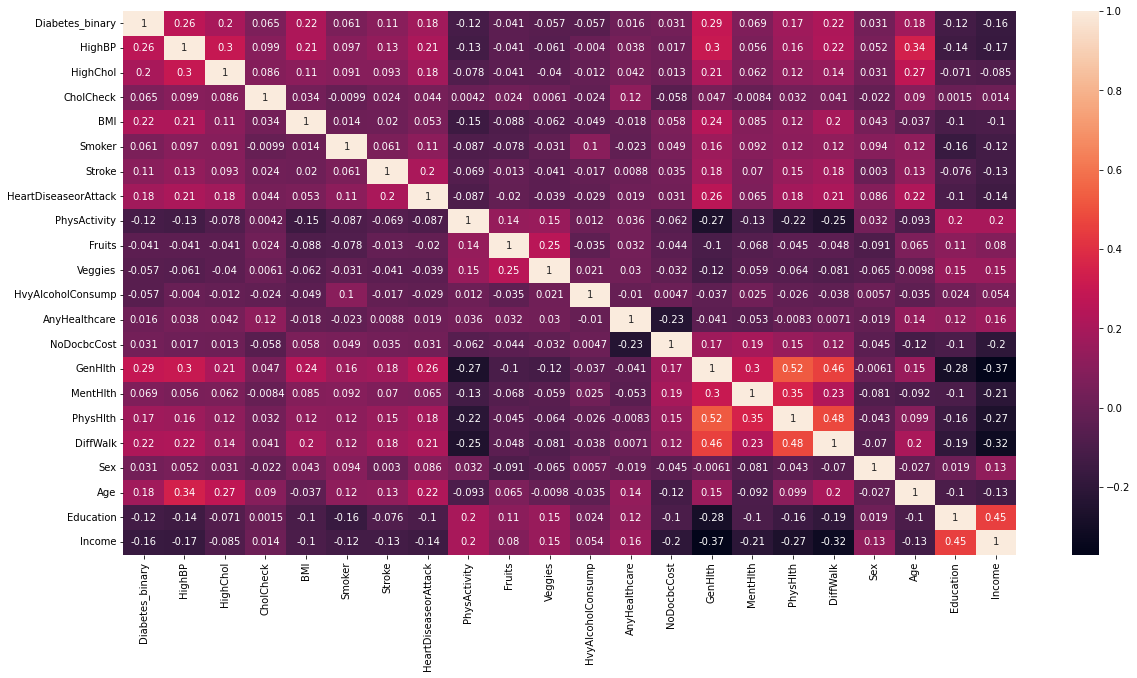

In [11]:
# Visualizing Correlation
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(1, figsize=(20,10))
sns.heatmap(data.corr(), annot=True, ax=ax)

In [5]:
'''Prep Data'''

# Generate dependent variable
y = data.iloc[:,0]
# Generate matrix of features
X = data.iloc[:,1:-1]

print(X.shape, y.shape)

'''Splitting dataset into training and testing dataset''' 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)


(253680, 20) (253680,)


In [6]:
'''Performing Feature Scaling'''
# Normalization is used only when our dataset follows a normal distribution (-1 to +1)
# while standardization is a universal technique that can be used for any dataset irrespective of the distribution (-3 to +3)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [7]:
'''Training Artificial Neural Network'''
# !! experiment with the value
number_of_nodes = 6

def keras_model():
    #initialize ANN
    ann = tf.keras.models.Sequential()

    # architecture: 2 hidden layers, 1 input layer, and 1 output layer

    # first hidden layer
    ann.add(tf.keras.layers.Dense(units=number_of_nodes,activation="relu"))

    # second hidden layer
    ann.add(tf.keras.layers.Dense(units=number_of_nodes,activation="relu"))

    # output layer
    # two classes as output (0 or 1) => one node
    # binary classification => sigmoid activation function
    ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
    
    return ann


In [8]:
'''Compiling ANN'''
ann = keras_model()

ann.compile(optimizer="Adam",
            loss="binary_crossentropy",
            metrics=['accuracy'])

'''Fitting ANN'''
history = ann.fit(X_train, y_train, validation_split=0.33, batch_size=32,epochs = 100)



2022-04-23 15:25:09.658073: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
4250/4250 [==============================] - 15s 3ms/step - loss: 0.3399 - accuracy: 0.8599 - val_loss: 0.3125 - val_accuracy: 0.8660
Epoch 2/100
4250/4250 [==============================] - 12s 3ms/step - loss: 0.3193 - accuracy: 0.8634 - val_loss: 0.3124 - val_accuracy: 0.8663
Epoch 3/100
4250/4250 [==============================] - 12s 3ms/step - loss: 0.3182 - accuracy: 0.8640 - val_loss: 0.3104 - val_accuracy: 0.8680
Epoch 4/100
4250/4250 [==============================] - 12s 3ms/step - loss: 0.3177 - accuracy: 0.8642 - val_loss: 0.3097 - val_accuracy: 0.8684
Epoch 5/100
4250/4250 [==============================] - 11s 3ms/step - loss: 0.3174 - accuracy: 0.8646 - val_loss: 0.3098 - val_accuracy: 0.8687
Epoch 6/100
4250/4250 [==============================] - 11s 3ms/step - loss: 0.3172 - accuracy: 0.8650 - val_loss: 0.3092 - val_accuracy: 0.8685
Epoch 7/100
4250/4250 [==============================] - 12s 3ms/step - loss: 0.3171 - accuracy: 0.8649 - val_loss: 0.3096 -

In [9]:
'''Predicting and Evaluating Model'''
from sklearn.metrics import accuracy_score
y_pred = ann.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy_score(y_test, y_pred)

0.8603358561967833

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


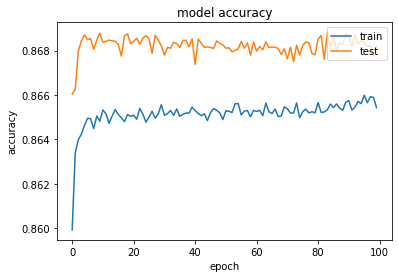

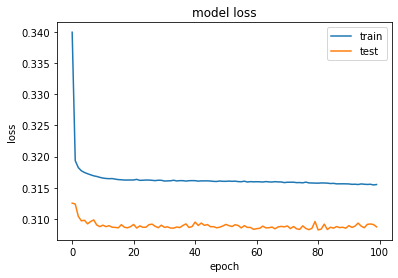

In [10]:
'''Visualizing Accuracy and Loss'''

import matplotlib.pyplot as plt

print(history.history.keys())

'''summarize history for accuracy'''
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


'''summarize history for loss'''
# loss - elbow shaped means model have achieved maximum accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

